In [ ]:
import pickle

results_5_vars = {}

with open('journal_results_td2c_pcmci_N5.pkl', 'rb') as f:


In [26]:
import pickle
results = {}

for N in [5, 10, 25]:
    results[N] = {}
    for method in ['t2dc', 't2dc_cmiknn', 'pcmci', 'granger', 'dyno', 'varlingam']: #small naming issue for td2c
        if method == 'varlingam' and N == 25: #computational issues
            results[N][f'{method}_rocs'] = None
            results[N][f'{method}_precision'] = None 
            results[N][f'{method}_recall'] = None
            results[N][f'{method}_f1'] = None
        else:
            with open(f'journal_results_{method}_N{N}.pkl', 'rb') as f:
                rocs, precision, recall, f1 = pickle.load(f)
            results[N][f'{method}_rocs'] = rocs
            results[N][f'{method}_precision'] = precision
            results[N][f'{method}_recall'] = recall
            results[N][f'{method}_f1'] = f1

Old version of D2C

In [15]:
results[5]['t2dc_rocs'][10]

{0: 0.4903846153846154,
 1: 0.7988505747126436,
 2: 0.53258547008547,
 3: 0.4001210653753026,
 4: 0.7863247863247862,
 5: 0.3978260869565218,
 6: 0.4776029055690072,
 7: 0.8092948717948718,
 8: 0.4636752136752137,
 9: 0.7066666666666667,
 10: 0.5042372881355932,
 11: 0.32263922518159804,
 12: 0.30333333333333334,
 13: 0.8777239709443099,
 14: 0.7581417624521073,
 15: 0.2759103641456583,
 16: 0.4698879551820728,
 17: 0.34961685823754785,
 18: 0.48717948717948717,
 19: 0.9508547008547009,
 20: 0.5714285714285715,
 21: 0.3433908045977011,
 22: 0.31840193704600483,
 23: 0.9262820512820513,
 24: 0.4001068376068376,
 25: 0.27884615384615385,
 26: 0.42251815980629537,
 27: 0.7380268199233716,
 28: 0.910411622276029,
 29: 0.423728813559322,
 30: 0.5181598062953995,
 31: 0.6083535108958837,
 32: 0.5035014005602241,
 33: 0.5952380952380952,
 34: 0.4155982905982906,
 35: 0.8071581196581196,
 36: 0.7825854700854701,
 37: 0.5014005602240896,
 38: 0.5763888888888888,
 39: 0.3819444444444444}

None
[0      0.918803
1      0.876916
2      0.901175
3      0.907990
4      0.915064
         ...   
715    1.000000
716    1.000000
717    1.000000
718    1.000000
719    1.000000
Length: 720, dtype: float64, 0      0.490385
1      0.798851
2      0.532585
3      0.400121
4      0.786325
         ...   
715    1.000000
716    1.000000
717    1.000000
718    1.000000
719    1.000000
Length: 720, dtype: float64, 0      0.575855
1      0.650383
2      0.536325
3      0.276029
4      0.389957
         ...   
715    0.821107
716    0.866474
717    0.817661
718    0.855212
719    0.819954
Length: 720, dtype: float64, 0      0.243590
1      0.324713
2      0.232906
3      0.182809
4      0.229701
         ...   
715    0.161519
716    0.115830
717    0.248853
718    0.234234
719    0.304472
Length: 720, dtype: float64, None]


TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

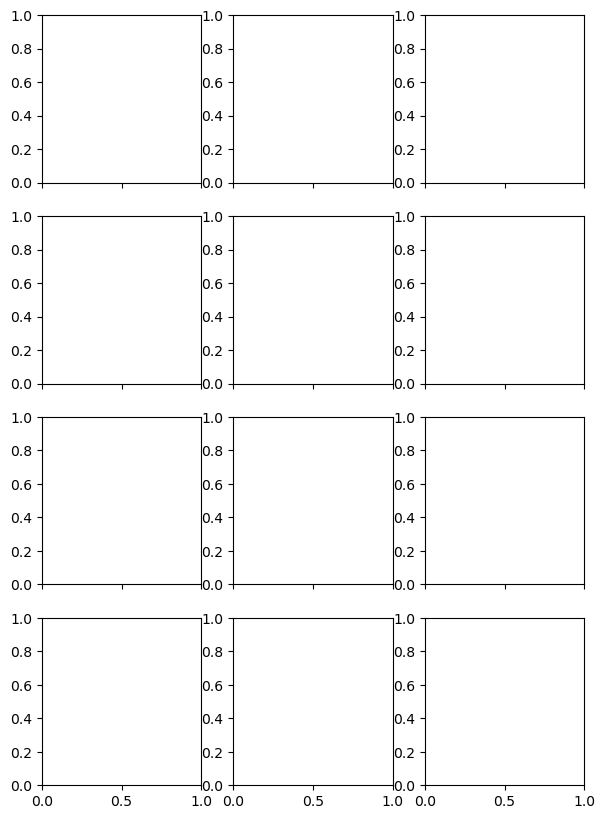

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a function to combine data for each method across all processes
def combine_data(data_dict, metric):
    combined_td2c_cmiknn = pd.concat([pd.Series(data_dict[f't2dc_cmiknn_{metric}'][proc]) for proc in data_dict[f't2dc_cmiknn_{metric}']], ignore_index=True)
    combined_td2c = pd.concat([pd.Series(data_dict[f't2dc_{metric}'][proc]) for proc in data_dict[f't2dc_{metric}']], ignore_index=True)
    combined_pcmci = pd.concat([pd.Series(data_dict[f'pcmci_{metric}'][proc]) for proc in data_dict[f'pcmci_{metric}']], ignore_index=True)
    print(data_dict[f'dyno_{metric}'][10][0])
    if data_dict[f'dyno_{metric}'][10][0] is not None:
        combined_dyno = pd.concat([pd.Series(data_dict[f'dyno_{metric}'][proc]) for proc in data_dict[f'dyno_{metric}']], ignore_index=True)
    else:
        combined_dyno = None
    if data_dict[f'varlingam_{metric}'] is not None:
        combined_varlingam = pd.concat([pd.Series(data_dict[f'varlingam_{metric}'][proc]) for proc in data_dict[f'varlingam_{metric}']], ignore_index=True)
    else:
        combined_varlingam = None
    combined_granger = pd.concat([pd.Series(data_dict[f'granger_{metric}'][proc]) for proc in data_dict[f'granger_{metric}']], ignore_index=True)

    # return [combined_td2c, combined_pcmci, combined_varlingam, combined_granger, combined_dyno]
    return [combined_td2c_cmiknn, combined_td2c, combined_pcmci, combined_granger, combined_dyno]

# Combine the data for each metric
metrics = ['rocs','precision', 'recall', 'f1']
y_label = ['ROC AUC','Precision', 'Recall', 'F1-score']

n_values = [results[5], results[10], results[25]]
n_labels = ['N=5', 'N=10', 'N=25']
# labels = ['TD2C', 'PCMCI', 'VARLINGAM', 'Granger','DYNOTEARS']
labels = ['TD2C - cmiknn', 'TD2C', 'PCMCI', 'VARLINGAM', 'Granger', 'DYNOTEARS']

# Create subplots
fig, axes = plt.subplots(len(metrics), len(n_values), figsize=(7, 10), sharex=True, sharey=False)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
fontsize = 7

for i, metric in enumerate(metrics):
    for j, n_data in enumerate(n_values):

        combined_data = combine_data(n_data, metric)
        ax = axes[i, j]

        print(combined_data)

        # if metric == 'rocs':  # Handle empty DynoTears data for ROC AUC
        #     box = ax.boxplot(combined_data[:4], patch_artist=True, widths=0.3)
        #     ax.set_xticks(range(1, 5))
        #     ax.set_xticklabels(labels[:4], rotation=-90, fontsize=fontsize)
        # else:
        box = ax.boxplot(combined_data, patch_artist=True, widths=0.3)
        ax.set_xticks(range(1, len(labels) + 1))
        ax.set_xticklabels(labels, rotation=-90, fontsize=fontsize)
        
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)
        
        ax.set_xticks(range(1, len(labels) + 1))
        ax.set_xticklabels(labels, rotation=-90, fontsize=fontsize)
        if j == 0:
            ax.set_ylabel(y_label[i], fontsize=fontsize)
        if i == 0:
            ax.set_title(n_labels[j], fontsize=fontsize)
        ax.grid(True)

plt.tight_layout()
# plt.savefig('combined_metrics.pdf', format='pdf')
plt.show()


In [6]:
import sys
import os
import pandas as pd
import numpy as np

from d2c.benchmark.cd_plot import draw_cd_diagram


/home/gpaldino/miniconda3/envs/d2cpy/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The function expects a dataframe as follows 

| dataset_name   |      Model      |  Score |
|----------|:-------------:|------:|
| 1 |  d2c | 0.7 |
| 2 |    var   |  0.55 |
| 3 | dynoteas |    0.65 |


In [7]:
#[combined_td2c, combined_pcmci, combined_varlingam, combined_dyno
data = {5: results_5_vars, 10: results_10_vars, 25: results_25_vars}
mapping = {'rocs': 'ROC AUC', 'precision': 'Precision', 'recall': 'Recall', 'f1': 'F1-score'}
for metric in ['rocs','precision', 'recall', 'f1']:
    for n_var in [5,10,25]:
        combined_data = combine_data(data[n_var], metric)
        td2c = pd.concat([pd.Series(range(1,len(combined_data[0])+1)),pd.Series(['TD2C']*len(combined_data[0])),combined_data[0]], axis=1)
        pcmci = pd.concat([pd.Series(range(1,len(combined_data[1])+1)),pd.Series(['PCMCI']*len(combined_data[1])),combined_data[1]], axis=1)
        varlingam = pd.concat([pd.Series(range(1,len(combined_data[2])+1)),pd.Series(['VARLINGAM']*len(combined_data[2])),combined_data[2]], axis=1)
        granger = pd.concat([pd.Series(range(1,len(combined_data[3])+1)),pd.Series(['Granger']*len(combined_data[3])),combined_data[3]], axis=1)

        if metric != 'rocs':
            dyno = pd.concat([pd.Series(range(1,len(combined_data[4])+1)),pd.Series(['DYNOTEARS']*len(combined_data[4])),combined_data[4]], axis=1)
            combined_data = pd.concat([td2c, pcmci, varlingam, granger, dyno], axis=0)
        else:
            combined_data = pd.concat([td2c, pcmci, varlingam, granger], axis=0)

        combined_data.columns = ['dataset_name', 'Model', 'Score']

        path = f'cd_{metric}_{n_var}.png'

        draw_cd_diagram(path, df_perf=combined_data, title=mapping[metric], labels=False)



['TD2C' 'PCMCI' 'VARLINGAM' 'Granger']
       Model  count
0    Granger    720
1      PCMCI    720
2       TD2C    720
3  VARLINGAM    720
[[0.24252137 0.32136015 0.22970085 ... 0.23079128 0.25804376 0.31020642]
 [0.5758547  0.65038314 0.53632479 ... 0.81766055 0.85521236 0.81995413]
 [0.94978632 0.93582375 0.84935897 ... 1.         0.99967825 0.9997133 ]
 [0.41239316 0.57423372 0.3792735  ... 0.68205275 0.7545045  0.63933486]]
Granger        0.0
PCMCI        223.0
TD2C         319.0
VARLINGAM     91.0
dtype: float64
Granger      3.990278
VARLINGAM    2.336111
PCMCI        1.905556
TD2C         1.768056
dtype: float64
('Granger', 'TD2C', 1.562669830393708e-119, True)
('Granger', 'VARLINGAM', 1.6986146913258989e-119, True)
('Granger', 'PCMCI', 1.93298557614071e-119, True)
('TD2C', 'VARLINGAM', 5.5226638749828135e-27, True)
('PCMCI', 'TD2C', 2.527819245573857e-13, True)
('PCMCI', 'VARLINGAM', 1.2206265997901063e-11, True)
Index(['Granger', 'VARLINGAM', 'PCMCI', 'TD2C'], dtype='object')


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

['TD2C' 'PCMCI' 'VARLINGAM' 'Granger']
       Model  count
0    Granger    720
1      PCMCI    720
2       TD2C    720
3  VARLINGAM    720
[[0.20989691 0.14168378 0.21690415 ... 0.20884878 0.17985775 0.19397703]
 [0.51958763 0.54857053 0.5892096  ... 0.74084827 0.9091253  0.84084535]
 [0.9214433  0.97780761 0.91109487 ... 0.99845367 0.99882718 0.9984976 ]
 [0.40817869 0.50023693 0.44549994 ... 0.71891568 0.76278753 0.73654514]]
Granger        0.0
PCMCI        241.0
TD2C         360.0
VARLINGAM     58.0
dtype: float64
Granger      4.000000
VARLINGAM    2.428472
PCMCI        1.886806
TD2C         1.684722
dtype: float64
('Granger', 'PCMCI', 1.562671526770502e-119, True)
('Granger', 'VARLINGAM', 1.562681705069756e-119, True)
('Granger', 'TD2C', 1.5627733127251292e-119, True)
('TD2C', 'VARLINGAM', 1.5811767835385978e-47, True)
('PCMCI', 'TD2C', 8.45837478230282e-24, True)
('PCMCI', 'VARLINGAM', 1.4356445307835204e-16, True)
Index(['Granger', 'VARLINGAM', 'PCMCI', 'TD2C'], dtype='object')


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

['TD2C' 'PCMCI' 'VARLINGAM' 'Granger']
       Model  count
0    Granger    720
1      PCMCI    720
2       TD2C    720
3  VARLINGAM    720
[[0.1631189  0.13169163 0.17495361 ... 0.14521757 0.14388061 0.12346864]
 [0.53073425 0.48279635 0.56916048 ... 0.81794951 0.83903372 0.90408567]
 [0.90622427 0.87163872 0.88665803 ... 0.99489943 0.99818181 0.99868303]
 [0.45264605 0.48049281 0.45822677 ... 0.75861525 0.7652845  0.7688969 ]]
Granger        0.0
PCMCI        251.0
TD2C         325.0
VARLINGAM    131.0
dtype: float64
Granger      4.000000
VARLINGAM    2.315278
PCMCI        1.900694
TD2C         1.784028
dtype: float64
('Granger', 'PCMCI', 1.562683401459351e-119, True)
('Granger', 'VARLINGAM', 1.562683401459351e-119, True)
('Granger', 'TD2C', 1.5628123324192715e-119, True)
('TD2C', 'VARLINGAM', 1.8693631173086865e-23, True)
('PCMCI', 'VARLINGAM', 5.829267594252423e-14, True)
('PCMCI', 'TD2C', 7.715949644903871e-14, True)
Index(['Granger', 'VARLINGAM', 'PCMCI', 'TD2C'], dtype='object')


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

['TD2C' 'PCMCI' 'VARLINGAM' 'Granger' 'DYNOTEARS']
       Model  count
0  DYNOTEARS    720
1    Granger    720
2      PCMCI    720
3       TD2C    720
4  VARLINGAM    720
[[0.075      0.07526882 0.05952381 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.0625     0.05797101 0.06976744]
 [0.         0.33333333 0.         ... 0.24193548 0.23913043 0.2745098 ]
 [1.         1.         1.         ... 0.76190476 0.77777778 0.8       ]
 [0.046875   0.08695652 0.04545455 ... 0.17073171 0.32142857 0.17391304]]
DYNOTEARS     38.0
Granger        4.0
PCMCI        108.0
TD2C         442.0
VARLINGAM    119.0
dtype: float64
DYNOTEARS    4.161806
Granger      3.933333
VARLINGAM    2.472917
PCMCI        2.338889
TD2C         2.093056
dtype: float64
('Granger', 'VARLINGAM', 3.9834341094317572e-112, True)
('Granger', 'PCMCI', 6.112093880421745e-111, True)
('Granger', 'TD2C', 4.889814126229598e-91, True)
('DYNOTEARS', 'PCMCI', 2.0773666209489023e-75, True)
('DYNOTEARS', 'TD2C

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

['TD2C' 'PCMCI' 'VARLINGAM' 'Granger' 'DYNOTEARS']
       Model  count
0  DYNOTEARS    720
1    Granger    720
2      PCMCI    720
3       TD2C    720
4  VARLINGAM    720
[[0.03703704 0.01530612 0.04132231 ... 0.         0.         0.        ]
 [0.         0.         0.0212766  ... 0.02713178 0.01875    0.02447552]
 [0.06666667 0.02857143 0.04545455 ... 0.2        0.23214286 0.13978495]
 [0.83333333 0.83333333 0.90909091 ... 0.89189189 0.71794872 0.71111111]
 [0.02597403 0.03488372 0.03539823 ... 0.14814815 0.15686275 0.15966387]]
DYNOTEARS     30.0
Granger        0.0
PCMCI         86.0
TD2C         514.0
VARLINGAM     88.0
dtype: float64
DYNOTEARS    4.390972
Granger      4.042361
VARLINGAM    2.571528
PCMCI        2.374306
TD2C         1.620833
dtype: float64
('Granger', 'PCMCI', 2.395454993669713e-115, True)
('Granger', 'TD2C', 2.664899659412224e-115, True)
('Granger', 'VARLINGAM', 9.195764774240853e-115, True)
('DYNOTEARS', 'TD2C', 1.2147340048764878e-104, True)
('TD2C', 'VARLINGAM

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

['TD2C' 'PCMCI' 'VARLINGAM' 'Granger' 'DYNOTEARS']
       Model  count
0  DYNOTEARS    720
1    Granger    720
2      PCMCI    720
3       TD2C    720
4  VARLINGAM    720
[[0.03703704 0.01530612 0.04132231 ... 0.         0.         0.        ]
 [0.00729927 0.         0.         ... 0.00667694 0.00709579 0.00492072]
 [0.00653595 0.         0.01142857 ... 0.09278351 0.07927677 0.09297913]
 [0.64102564 0.53191489 0.65789474 ... 0.39       0.43786982 0.5       ]
 [0.02083333 0.03389831 0.02158273 ... 0.14035088 0.13740458 0.15441176]]
DYNOTEARS     40.0
Granger        0.0
PCMCI         18.0
TD2C         508.0
VARLINGAM    154.0
dtype: float64
DYNOTEARS    4.370833
Granger      4.013194
PCMCI        2.758333
VARLINGAM    2.243056
TD2C         1.614583
dtype: float64
('Granger', 'PCMCI', 3.262410909149887e-116, True)
('Granger', 'TD2C', 3.506112676024266e-116, True)
('Granger', 'VARLINGAM', 1.0606298615694623e-115, True)
('PCMCI', 'TD2C', 4.687666087433377e-94, True)
('DYNOTEARS', 'TD2C', 4.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

['TD2C' 'PCMCI' 'VARLINGAM' 'Granger' 'DYNOTEARS']
       Model  count
0  DYNOTEARS    720
1    Granger    720
2      PCMCI    720
3       TD2C    720
4  VARLINGAM    720
[[0.75       0.77777778 0.625      ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.25       0.28571429 0.375     ]
 [0.         0.22222222 0.         ... 0.9375     0.78571429 0.875     ]
 [0.625      0.55555556 0.625      ... 1.         1.         1.        ]
 [0.375      0.44444444 0.375      ... 0.4375     0.64285714 0.5       ]]
DYNOTEARS     20.0
Granger       33.0
PCMCI        154.0
TD2C         130.0
VARLINGAM    148.0
dtype: float64
DYNOTEARS    4.301389
Granger      3.687500
TD2C         2.911806
VARLINGAM    2.063194
PCMCI        2.036111
dtype: float64
('Granger', 'VARLINGAM', 2.2856033878260513e-107, True)
('DYNOTEARS', 'VARLINGAM', 3.8744986054262675e-107, True)
('Granger', 'PCMCI', 7.548050924694877e-104, True)
('DYNOTEARS', 'PCMCI', 3.584992636227159e-94, True)
('DYNOTEARS

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

['TD2C' 'PCMCI' 'VARLINGAM' 'Granger' 'DYNOTEARS']
       Model  count
0  DYNOTEARS    720
1    Granger    720
2      PCMCI    720
3       TD2C    720
4  VARLINGAM    720
[[0.13333333 0.23076923 0.29411765 ... 0.         0.         0.        ]
 [0.         0.         0.05882353 ... 0.20588235 0.10714286 0.21875   ]
 [0.13333333 0.07692308 0.05882353 ... 0.52941176 0.92857143 0.8125    ]
 [0.66666667 0.76923077 0.58823529 ... 0.97058824 1.         1.        ]
 [0.13333333 0.23076923 0.23529412 ... 0.58823529 0.57142857 0.59375   ]]
DYNOTEARS     10.0
Granger       27.0
PCMCI        220.0
TD2C         165.0
VARLINGAM    139.0
dtype: float64
DYNOTEARS    4.566667
Granger      3.711111
TD2C         2.565972
VARLINGAM    2.221528
PCMCI        1.934722
dtype: float64
('DYNOTEARS', 'TD2C', 8.593969754111067e-109, True)
('DYNOTEARS', 'VARLINGAM', 5.487137925307427e-106, True)
('Granger', 'PCMCI', 2.2624697439918655e-105, True)
('DYNOTEARS', 'PCMCI', 4.723984112391681e-105, True)
('Granger', 'V

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

['TD2C' 'PCMCI' 'VARLINGAM' 'Granger' 'DYNOTEARS']
       Model  count
0  DYNOTEARS    720
1    Granger    720
2      PCMCI    720
3       TD2C    720
4  VARLINGAM    720
[[0.13333333 0.23076923 0.29411765 ... 0.         0.         0.        ]
 [0.03030303 0.         0.         ... 0.1625     0.18918919 0.140625  ]
 [0.03030303 0.         0.05405405 ... 0.7875     0.77027027 0.765625  ]
 [0.75757576 0.73529412 0.67567568 ... 0.975      1.         1.        ]
 [0.2        0.15384615 0.17647059 ... 0.70588235 0.64285714 0.65625   ]]
DYNOTEARS     11.0
Granger       34.0
PCMCI        208.0
TD2C         160.0
VARLINGAM    215.0
dtype: float64
DYNOTEARS    4.646528
Granger      3.632639
TD2C         2.576389
VARLINGAM    2.165972
PCMCI        1.978472
dtype: float64
('DYNOTEARS', 'TD2C', 5.17273544359423e-111, True)
('Granger', 'VARLINGAM', 1.0975512853965397e-106, True)
('DYNOTEARS', 'VARLINGAM', 1.3714834546323242e-105, True)
('Granger', 'PCMCI', 2.7559373814203256e-105, True)
('DYNOTEARS

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

['TD2C' 'PCMCI' 'VARLINGAM' 'Granger' 'DYNOTEARS']
       Model  count
0  DYNOTEARS    720
1    Granger    720
2      PCMCI    720
3       TD2C    720
4  VARLINGAM    720
[[0.13636364 0.1372549  0.10869565 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.1        0.09638554 0.11764706]
 [0.         0.26666667 0.         ... 0.38461538 0.36666667 0.41791045]
 [0.76923077 0.71428571 0.76923077 ... 0.86486486 0.875      0.88888889]
 [0.08333333 0.14545455 0.08108108 ... 0.24561404 0.42857143 0.25806452]]
DYNOTEARS      6.0
Granger        7.0
PCMCI        210.0
TD2C         353.0
VARLINGAM    139.0
dtype: float64
DYNOTEARS    4.259028
Granger      3.890278
TD2C         2.383333
VARLINGAM    2.341667
PCMCI        2.125694
dtype: float64
('Granger', 'VARLINGAM', 4.1994196696403285e-112, True)
('Granger', 'PCMCI', 1.3201676232280925e-109, True)
('DYNOTEARS', 'PCMCI', 2.3320871753650118e-108, True)
('DYNOTEARS', 'VARLINGAM', 3.281942979860705e-105, True)
('Granger

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

['TD2C' 'PCMCI' 'VARLINGAM' 'Granger' 'DYNOTEARS']
       Model  count
0  DYNOTEARS    720
1    Granger    720
2      PCMCI    720
3       TD2C    720
4  VARLINGAM    720
[[0.05797101 0.02870813 0.07246377 ... 0.         0.         0.        ]
 [0.         0.         0.03125    ... 0.04794521 0.03191489 0.04402516]
 [0.08888889 0.04166667 0.05128205 ... 0.29032258 0.37142857 0.23853211]
 [0.74074074 0.8        0.71428571 ... 0.92957746 0.8358209  0.83116883]
 [0.04347826 0.06060606 0.06153846 ... 0.23668639 0.24615385 0.25165563]]
DYNOTEARS     10.0
Granger        0.0
PCMCI        128.0
TD2C         479.0
VARLINGAM    102.0
dtype: float64
DYNOTEARS    4.452083
Granger      4.007639
VARLINGAM    2.504861
PCMCI        2.251389
TD2C         1.784028
dtype: float64
('Granger', 'PCMCI', 7.247768295069747e-114, True)
('Granger', 'TD2C', 1.0271710307067893e-113, True)
('Granger', 'VARLINGAM', 1.0383537374175978e-112, True)
('DYNOTEARS', 'TD2C', 2.360386907211226e-112, True)
('DYNOTEARS', 'PCM

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

['TD2C' 'PCMCI' 'VARLINGAM' 'Granger' 'DYNOTEARS']
       Model  count
0  DYNOTEARS    720
1    Granger    720
2      PCMCI    720
3       TD2C    720
4  VARLINGAM    720
[[0.05797101 0.02870813 0.07246377 ... 0.         0.         0.        ]
 [0.01176471 0.         0.         ... 0.01282684 0.01367855 0.00950872]
 [0.01075269 0.         0.01886792 ... 0.16600791 0.14375788 0.16582064]
 [0.69444444 0.61728395 0.66666667 ... 0.55714286 0.6090535  0.66666667]
 [0.03773585 0.05555556 0.03846154 ... 0.23414634 0.22641509 0.25      ]]
DYNOTEARS     20.0
Granger        0.0
PCMCI         26.0
TD2C         452.0
VARLINGAM    222.0
dtype: float64
DYNOTEARS    4.440278
Granger      4.006250
PCMCI        2.676389
VARLINGAM    2.129167
TD2C         1.747917
dtype: float64
('Granger', 'TD2C', 7.812434339278238e-116, True)
('Granger', 'VARLINGAM', 1.2967738154948075e-115, True)
('Granger', 'PCMCI', 2.2691298258633865e-115, True)
('DYNOTEARS', 'TD2C', 6.736557940220028e-110, True)
('DYNOTEARS', 'VAR

# Combine across N

In [60]:
results_5_vars['td2c_rocs_process']

{10: {0: 0.9497863247863249,
  1: 0.935823754789272,
  2: 0.8493589743589743,
  3: 0.9249394673123487,
  4: 0.8386752136752137,
  5: 0.9443478260869564,
  6: 0.8571428571428571,
  7: 0.829594017094017,
  8: 0.8205128205128205,
  9: 1.0,
  10: 0.8819612590799031,
  11: 0.9303874092009685,
  12: 1.0,
  13: 0.9558111380145278,
  14: 0.9262452107279694,
  15: 0.9880952380952381,
  16: 0.9166666666666667,
  17: 0.8644636015325671,
  18: 0.9150641025641025,
  19: 0.9428418803418803,
  20: 0.9726890756302521,
  21: 0.863984674329502,
  22: 0.9043583535108959,
  23: 0.9246794871794872,
  24: 0.8621794871794872,
  25: 0.8520299145299145,
  26: 0.87590799031477,
  27: 0.8424329501915708,
  28: 0.9727602905569006,
  29: 0.8989104116222759,
  30: 0.8583535108958839,
  31: 0.9152542372881356,
  32: 0.9831932773109243,
  33: 0.9950980392156863,
  34: 0.8824786324786326,
  35: 0.8680555555555556,
  36: 0.8931623931623932,
  37: 0.9929971988795517,
  38: 0.9268162393162392,
  39: 0.8947649572649573},


In [54]:
#[combined_td2c, combined_pcmci, combined_varlingam, combined_dyno
data = {5: results_5_vars, 10: results_10_vars, 25: results_25_vars}
mapping = {'rocs': 'ROC AUC', 'precision': 'Precision', 'recall': 'Recall', 'f1': 'F1-score'}
for metric in ['rocs','precision', 'recall', 'f1']:
    combined_data_across = pd.DataFrame()
    for i, n_var in enumerate([5,10,25]):
        combined_data = combine_data(data[n_var], 'rocs')
        td2c = pd.concat([pd.Series(range((i+1),len(combined_data[0])*(i+1)+1)),pd.Series(['TD2C']*len(combined_data[0])),combined_data[0]], axis=1)
        pcmci = pd.concat([pd.Series(range((i+1),len(combined_data[1])*(i+1)+1)),pd.Series(['PCMCI']*len(combined_data[1])),combined_data[1]], axis=1)
        varlingam = pd.concat([pd.Series(range(1*(i),len(combined_data[2])*(i+1)+1)),pd.Series(['VARLINGAM']*len(combined_data[2])),combined_data[2]], axis=1)
        
        if metric != 'rocs':
            dyno = pd.concat([pd.Series(range(1,len(combined_data[3])+1)),pd.Series(['DYNOTEARS']*len(combined_data[3])),combined_data[3]], axis=1)
            combined_data_across = pd.concat([combined_data_across, td2c, pcmci, varlingam, dyno], axis=0)
        else:   
            combined_data_across = pd.concat([combined_data_across, td2c, pcmci, varlingam], axis=0)

    combined_data_across.columns = ['dataset_name', 'Model', 'Score']
    #reset index
    combined_data_across.reset_index(drop=True, inplace=True)

    print(combined_data_across)
    path = f'cd_{metric}_combined.png'

    draw_cd_diagram(path, df_perf=combined_data_across, title=mapping[metric], labels=False)

    break

       dataset_name Model     Score
0                 1  TD2C  0.949786
1                 2  TD2C  0.935824
2                 3  TD2C  0.849359
3                 4  TD2C  0.924939
4                 5  TD2C  0.838675
...             ...   ...       ...
12949          2156   NaN       NaN
12950          2157   NaN       NaN
12951          2158   NaN       NaN
12952          2159   NaN       NaN
12953          2160   NaN       NaN

[12954 rows x 3 columns]
['TD2C' 'PCMCI' 'VARLINGAM' nan]
       Model  count
0      PCMCI   2160
1       TD2C   2160
2  VARLINGAM   2160
[[0.5758547  0.65038314 0.51958763 ... 0.84084535 0.83903372 0.90408567]
 [0.94978632 0.93582375 0.9214433  ... 0.9984976  0.99818181 0.99868303]
 [0.41239316 0.57423372 0.40817869 ... 0.73654514 0.7652845  0.7688969 ]]


ValueError: Shape of passed values is (3, 2160), indices imply (3, 723)

In [61]:
combined_data_across[719*4:]

,dataset_name,Model,Score
2876,717,TD2C,0.999811
2877,718,TD2C,0.999937
2878,719,TD2C,0.998454
2879,720,TD2C,0.998827
2880,721,TD2C,0.998498
...,...,...,...
12949,2156,NaN,NaN
12950,2157,NaN,NaN
12951,2158,NaN,NaN
12952,2159,NaN,NaN
